In [16]:
from __future__ import print_function
import time,sys,statistics,csv,math
import numpy as np

## The possible attributes in the data with the prediction at index 0. Smaller names for brevity.
attributes = ["rich","age","wc","fnlwgt","edu","edun","mar","occ","rel","race","sex","capg","canpl","hpw","nc"]

## Get the encoding of the csv file by replacing each categorical attribute value by its index.
wc_l = "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked".split(", ")
edu_l = "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool".split(", ")
mar_l = "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse".split(", ")
occ_l = "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces".split(", ")
rel_l = "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried".split(", ")
race_l = "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black".split(", ")
sex_l = "Female, Male".split(", ")
nc_l = "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands".split(", ")
encode = {
    "rich"   : {"0":0,"1":1},
    "wc"     : {wc_l[i]:i for i in range(len(wc_l))},
    "edu"    : {edu_l[i]:i for i in range(len(edu_l))},
    "mar"    : {mar_l[i]:i for i in range(len(mar_l))},
    "occ"    : {occ_l[i]:i for i in range(len(occ_l))},
    "rel"    : {rel_l[i]:i for i in range(len(rel_l))},
    "race"   : {race_l[i]:i for i in range(len(race_l))},
    "sex"    : {sex_l[i]:i for i in range(len(sex_l))},
    "nc"     : {nc_l[i]:i for i in range(len(nc_l))},
    }

def medians(file):
    """
    Given a csv file, find the medians of the categorical attributes for the whole data.
    params(1):
        file : string : the name of the file
    outputs(6):
        median values for the categorical columns
    """
    fin = open(file,"r")
    reader = csv.reader(fin)
    age, fnlwgt, edun, capg, capl, hpw = ([] for i in range(6))
    total = 0
    for row in reader:
        total+=1
        if(total==1):
            continue
        l = [x.lstrip().rstrip() for x in row]
        age.append(int(l[0]));
        fnlwgt.append(int(l[2]));
        edun.append(int(l[4]));
        capg.append(int(l[10]));
        capl.append(int(l[11]));
        hpw.append(int(l[12]));
    fin.close()
    return(statistics.median(age),statistics.median(fnlwgt),statistics.median(edun),statistics.median(capg),statistics.median(capl),statistics.median(hpw))

def preprocess(file,median):
    """
    Given a file, read its data by encoding categorical attributes and binarising continuos attributes based on median.
    params(1):
        file : string : the name of the file
    outputs(6):
        2D numpy array with the data
    """
    # Calculate the medians
    agem,fnlwgtm,edunm,capgm,caplm,hpwm = medians(file)
    fin = open(file,"r")
    reader = csv.reader(fin)
    data = []
    total = 0
    for row in reader:
        total+=1
        # Skip line 0 in the file
        if(total==1):
            continue
        l = [x.lstrip().rstrip() for x in row]
        t = [0 for i in range(15)]

        # Encode the categorical attributes
        t[0] = encode["rich"][l[-1]]; t[2] = encode["wc"][l[1]]; t[4] = encode["edu"][l[3]]
        t[6] = encode["mar"][l[5]]; t[7] = encode["occ"][l[6]]; t[8] = encode["rel"][l[7]]
        t[9] = encode["race"][l[8]]; t[10] = encode["sex"][l[9]]; t[14] = encode["nc"][l[13]]

        # Binarize the numerical attributes based on median.
        # Modify this section to read the file in part c where you split the continuos attributes baed on dynamic median values.
        if median:
            t[1] = float(l[0])>=agem; t[3] = float(l[2])>=fnlwgtm; t[5] = float(l[4])>=edunm;
            t[11] = float(l[10])>=capgm; t[12] = float(l[11])>=caplm; t[13] = float(l[12])>=hpwm;
        else:
            t[1] = float(l[0]); t[3] = float(l[2]); t[5] = float(l[4]);
            t[11] = float(l[10]); t[12] = float(l[11]); t[13] = float(l[12]);
        # Convert some of the booleans to ints
        data.append([int(x) for x in t])

    return np.array(data,dtype=np.int64)

In [17]:
## Read the data
train_data = preprocess("../dataset/train.csv",1)
valid_data = preprocess("../dataset/valid.csv",1)
test_data = preprocess("../dataset/test.csv",1)
train_data_raw = preprocess("../dataset/train.csv",0)
valid_data_raw = preprocess("../dataset/valid.csv",0)
test_data_raw = preprocess("../dataset/test.csv",0)

print("The sizes are ","Train:",len(train_data),", Validation:",len(valid_data),", Test:",len(test_data))

The sizes are  Train: 27000 , Validation: 3000 , Test: 7000


In [53]:
cont_attribute = [1,3,5,11,12,13]

In [54]:
class Tree:
    def __init__(self):
        attr = None
        label =None
        child_list = None
        thresh = None
        is_leaf =None
        aux_val = None
        index = None

In [55]:
def i_gain(pos_val,neg_val):
    total = pos_val + neg_val
    if pos_val==0:
        return 0
    if neg_val==0:
        return 0
    i_gain_val =  -1 * ((1.0 * pos_val)/total) * math.log((1.0 * pos_val)/total) - ((1.0 * neg_val)/total)*math.log((1.0*neg_val)/total)
    return i_gain_val

In [56]:
def median_data(pos_list,neg_list,attribute):
    attr_data = []
    for i in range(len(pos_list)):
        ind = pos_list[i]
        attr_value = train_data_raw[ind][attribute]
        attr_data.append(attr_value)
    for i in range(len(neg_list)):
        ind = neg_list[i]
        attr_value = train_data_raw[ind][attribute]
        attr_data.append(attr_value)
    median_value = statistics.median(attr_data)
    return median_value
    

In [57]:
def information_gain(pos_list,neg_list,attribute,raw):
    attr_map = {}
    total_examples = len(pos_list) + len(neg_list)
    if attribute in cont_attribute:
        median_value = median_data(pos_list,neg_list,attribute)
    for i in range(len(pos_list)):
        ind = pos_list[i]
        if (raw)  and (attribute in cont_attribute):
            attr_value = train_data_raw[ind][attribute] >= median_value
        else:
            attr_value = train_data[ind][attribute]
        if attr_value in attr_map:
            attr_map[attr_value][0] +=1
        else:
            attr_map[attr_value] = [1,0]
    for i in range(len(neg_list)):
        ind = neg_list[i]
        if (raw)  and (attribute in cont_attribute):
            attr_value = train_data_raw[ind][attribute] >= median_value
        else:
            attr_value = train_data[ind][attribute]
        if attr_value in attr_map:
            attr_map[attr_value][1] +=1
        else:
            attr_map[attr_value] = [0,1]
    i_gain_map = {}
    for key in attr_map.keys():
        pos_val = attr_map[key][0]
        neg_val = attr_map[key][1]
        if pos_val==0 or neg_val==0:
            i_gain_map[key] = 0
        else:
            i_gain_map[key] = i_gain(pos_val,neg_val)
    final_i_gain = 0.0
    for key in attr_map.keys():
        val_total = attr_map[key][0] + attr_map[key][1]
        final_i_gain += ((val_total/(1.0 * total_examples)) * i_gain_map[key])
    return final_i_gain

In [58]:
def best_attr(pos_list,neg_list,raw):
    minn = float("inf")
    ind = -1
    for i in range(14):
        inf_i = information_gain(pos_list,neg_list,i+1,raw)
#         print (i,inf_i)
        if inf_i < minn:
            ind = i+1
            minn = inf_i
    return ind

In [59]:
def make_tree(pos_list,neg_list,raw):
    global counter
#     if len(pos_list)==0:
#         leaf_node = Tree()
#         leaf_node.label = 0
#         leaf_node.is_leaf = 1
#         return leaf_node
#     if len(neg_list)==0:
#         leaf_node = Tree()
#         leaf_node.label = 1
#         leaf_node.is_leaf = 1
#         return leaf_node
    pos_ex = len(pos_list)
    neg_ex = len(neg_list)
    curr_i_gain = i_gain(pos_ex,neg_ex)
    best_attribute = best_attr(pos_list,neg_list,raw)
    new_best_gain = information_gain(pos_list,neg_list,best_attribute,raw)
    new_node = Tree()
    if pos_ex > neg_ex :
        new_node.label = 1
    else:
        new_node.label = 0
    if curr_i_gain == new_best_gain:
        new_node.is_leaf = 1
        return new_node
    attr_map = {}
    new_node.index = counter
    counter +=1
    new_node.attr = best_attribute
    if raw and (best_attribute in cont_attribute):
        median_value = median_data(pos_list,neg_list,best_attribute)
        new_node.thresh = median_value
    new_node.child_list = {}
    new_node.is_leaf=0
    for i in range(len(pos_list)):
        ind = pos_list[i]
        if (raw)  and (best_attribute in cont_attribute):
            attr_value = train_data_raw[ind][best_attribute] >= median_value
        else:
            attr_value = train_data[ind][best_attribute]
        if attr_value in attr_map:
            attr_map[attr_value][0].append(ind)
        else:
            attr_map[attr_value] = [[ind],[]]
    for i in range(len(neg_list)):
        ind = neg_list[i]
        if (raw)  and (best_attribute in cont_attribute):
            attr_value = train_data_raw[ind][best_attribute] >= median_value
        else:
            attr_value = train_data[ind][best_attribute]
        if attr_value in attr_map:
            attr_map[attr_value][1].append(ind)
        else:
            attr_map[attr_value] = [[],[ind]]
#     print (best_attribute)
#     for key in attr_map.keys():
#         print (key,len(attr_map[key][0]),len(attr_map[key][1]))
#     print ()
    for key in attr_map.keys():
        new_node.child_list[key] = (make_tree(attr_map[key][0],attr_map[key][1],raw))
    return new_node
    

In [60]:
base_pos = []
base_neg = []
for i in range(len(train_data)):
    if train_data[i][0] == 1:
        base_pos.append(i)
    else:
        base_neg.append(i)
counter = 0
tree_root = make_tree(base_pos,base_neg,0)
counter = 0
tree_root_raw = make_tree(base_pos,base_neg,1)

In [61]:
import Queue
def get_bfs_list(root):
    bfs_q = Queue.Queue()
    bfs_list = []
    bfs_q.put(root)
    while not bfs_q.empty():
        curr_node = bfs_q.get()
        bfs_list.append(curr_node)
        for key in curr_node.child_list.keys():
            if not curr_node.child_list[key].is_leaf == 1:
                bfs_q.put(curr_node.child_list[key])
    return bfs_list
bfs_list = get_bfs_list(tree_root)
bfs_list_raw = get_bfs_list(tree_root_raw)

In [62]:
print (len(bfs_list),len(bfs_list_raw))

2853 6590


In [63]:
def accuracy_recur(pos_list,neg_list,node,raw):
    if node.is_leaf == 1:
        return
    own_label = node.label
    without_node = (1-own_label)*len(pos_list) + (own_label) * len(neg_list)
    divide_on = node.attr
    attr_map = {}
    with_node = 0
    for i in range(len(pos_list)):
        if raw and (divide_on in cont_attribute):
            attr_val = pos_list[i][divide_on] >= node.thresh
        else:
            attr_val = pos_list[i][divide_on]
        if attr_val in attr_map:
            attr_map[attr_val][0].append(pos_list[i])
        else:
            attr_map[attr_val] = [[pos_list[i]],[]]
    for i in range(len(neg_list)):
        if raw and (divide_on in cont_attribute):
            attr_val =  neg_list[i][divide_on] >= node.thresh
        else:
            attr_val =  neg_list[i][divide_on]
        if attr_val in attr_map:
            attr_map[attr_val][1].append(neg_list[i])
        else:
            attr_map[attr_val] = [[],[neg_list[i]]]
    for key in attr_map.keys():
        if key in node.child_list:
            child_label = node.child_list[key].label
            with_node += ((child_label)*len(attr_map[key][1]) + (1-child_label)*len(attr_map[key][0]))       
            accuracy_recur(attr_map[key][0],attr_map[key][1],node.child_list[key],raw)
        else:
            own_label = node.label
            with_node += ((own_label)*len(attr_map[key][1]) + (1-own_label)*len(attr_map[key][0])) 
    node.aux_val = (without_node) - with_node

In [64]:
def mis_accuracy(data,root,raw):
    nodes_list = get_bfs_list(root)
    num_nodes = len(nodes_list)
    for i in range(num_nodes):
        nodes_list[i].aux_val = 0
    pos_list = []
    neg_list = []
    for i in range(len(data)):
        if data[i][0] == 1:
            pos_list.append(data[i])
        else:
            neg_list.append(data[i])
    accuracy_recur(pos_list,neg_list,root,raw)
    final_list = []
    own_label = tree_root.label
    curr_missclassified = (1-own_label)*len(pos_list) + (own_label) * len(neg_list)
    final_list.append(curr_missclassified)
    for i in range(len(nodes_list)):
        node = nodes_list[i]
        change = node.aux_val
#         print (change)
        final_list.append(curr_missclassified-change)
        curr_missclassified -= change
    return final_list

In [65]:
def accuracy(data,root,raw):
    miss = mis_accuracy(data,root,raw)
    accur = []
    for i in range(len(miss)):
        accur.append((len(data) - miss[i])/(1.0 * len(data)))
    return accur

In [66]:
train_accur = accuracy(train_data,tree_root,0)
valid_accur = accuracy(valid_data,tree_root,0)
test_accur = accuracy(test_data,tree_root,0)

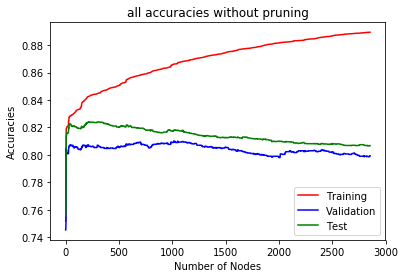

In [72]:
import matplotlib.pyplot as plt
plt.plot(train_accur,'r',label="Training")
plt.plot(valid_accur,'b',label="Validation")
plt.plot(test_accur,'g',label="Test")
plt.legend()
plt.title('all accuracies without pruning')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic.jpeg")

In [71]:
nuberr = len(train_accur) - 1
print ("training accuracy",train_accur[nuberr])
print ("validation accuracy",valid_accur[nuberr])
print ("test accuracy",test_accur[nuberr])

training accuracy 0.889333333333
validation accuracy 0.799333333333
test accuracy 0.806714285714


In [80]:
train_accur_raw = accuracy(train_data_raw,tree_root_raw,1)
valid_accur_raw = accuracy(valid_data_raw,tree_root_raw,1)
test_accur_raw = accuracy(test_data_raw,tree_root_raw,1)

In [82]:
nuberr = len(train_accur_raw) - 1
print ("training accuracy",train_accur_raw[nuberr])
print ("validation accuracy",valid_accur_raw[nuberr])
print ("test accuracy",test_accur_raw[nuberr])

training accuracy 0.988296296296
validation accuracy 0.791666666667
test accuracy 0.780714285714


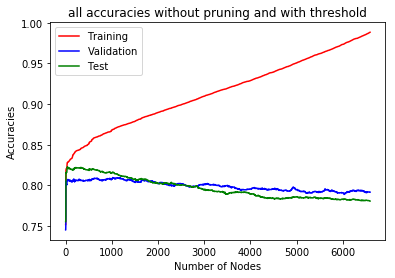

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_accur_raw,'r',label="Training")
plt.plot(valid_accur_raw,'b',label="Validation")
plt.plot(test_accur_raw,'g',label="Test")
plt.legend()
plt.title('all accuracies without pruning and with threshold')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic_raw.jpeg")

In [73]:
def recur_sum(node,lis):
    count = node.aux_val
    for key in node.child_list.keys():
        if node.child_list[key].is_leaf==0:
            count += recur_sum(node.child_list[key],lis)
    lis.append((node,count))
    return count


def summ(benef_list,raw):
    sum_benef_list = []
    for i in range(len(benef_list)):
        sum_benef_list.append(0)
    if raw:
        recur_sum(tree_root_raw,benef_list,sum_benef_list)
    else:
        recur_sum(tree_root,benef_list,sum_benef_list)
    return sum_benef_list
def node_count(node):
    count = 1
    for key in node.child_list.keys():
        if node.child_list[key].is_leaf==0:
            count += node_count(node.child_list[key])
    return count

In [74]:
counter = 0
tree_root = make_tree(base_pos,base_neg,0)

In [75]:
def prune_tree(root):
    global lis
    node_count = []
    valid_prune = []
    train_prune = []
    test_prune = []
    while True:
        train_accur = accuracy(train_data,root,0)
        test_accur = accuracy(test_data,root,0)
        valid_accur = accuracy(valid_data,root,0)
        num_nodes = len(train_accur)
        node_count.append(num_nodes)
        train_prune.append(train_accur[num_nodes-1])
        valid_prune.append(valid_accur[num_nodes-1])
        test_prune.append(test_accur[num_nodes-1])
        minn = 0
        min_node = None
        lis = []
        recur_sum(root,lis)
        for i in range(len(lis)):
            (node,count) = lis[i]
            if count <= minn:
                minn = count
                min_node = node
        if min_node==None:
            return (node_count,train_prune,valid_prune,test_prune)            
        else:
            min_node.is_leaf = 1
            min_node.child_list = None    

In [76]:
node_count,train_prune,valid_prune,test_prune = prune_tree(tree_root)

In [77]:
prune_tree(tree_root)

([110], [0.8368518518518518], [0.8346666666666667], [0.8281428571428572])

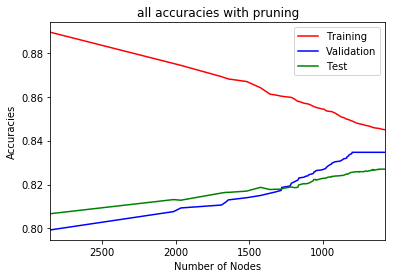

In [78]:
plt.plot(node_count,train_prune,'r',label="Training")
plt.plot(node_count,valid_prune,'b',label="Validation")
plt.plot(node_count,test_prune,'g',label="Test")
plt.xlim(node_count[0],node_count[109])
plt.legend()
plt.title('all accuracies with pruning')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic_prune_new.jpeg")

In [16]:
def splits(node,attribute):
    atr = node.attr
    maxx = 0
    max_lis = []
    for key in node.child_list.keys():
        if node.child_list[key].is_leaf==0:
            chil_lis = splits(node.child_list[key],attribute)
            if len(chil_lis) > maxx:
                maxx = len(chil_lis)
                max_lis = chil_lis
    if atr == attribute:
        max_lis = [node.thresh] + max_lis
    return max_lis

In [17]:
for attr in cont_attribute:
    ans = splits(tree_root_raw,attr)
    print (attr)
    print (ans)

1
[39, 47, 51.0, 54.0, 57, 60, 65.0, 62.0]
3
[188965.5, 127768, 159244.0, 142914.0, 136824, 129172]
5
[]
11
[7688, 20051]
12
[1485]
13
[50, 57.5, 65, 70]


In [18]:
def get_X_Y(data):
    X_tr = np.transpose(data)
    Y = X_tr[0]
    X_tr = X_tr[1:]
    X = np.transpose(X_tr)
    return X,Y

In [19]:
from sklearn.metrics import accuracy_score

In [25]:
train_X,train_Y = get_X_Y(train_data_raw)
valid_X,valid_Y = get_X_Y(valid_data_raw)
test_X,test_Y = get_X_Y(test_data_raw)

In [47]:
from sklearn.ensemble import RandomForestClassifier
n_estim = [5,10,15,20,25]
max_feat = [1,2,4,6,8]
boots = [True,False]
for est in n_estim:
    for feat in max_feat:
        for boot in boots:   
            clf = RandomForestClassifier(n_estimators=est,max_features=feat,bootstrap=boot)
            clf.fit(train_X, train_Y)
            valid_out = clf.predict(valid_X)
            acc = accuracy_score(valid_out,valid_Y)
            print ("n_estimator:",est,"\tmax_features:",feat,"\tbootstrap:",boot,"\taccuracy :",acc)

n_estimator: 5 	max_features: 1 	bootstrap: True 	accuracy : 0.8346666666666667
n_estimator: 5 	max_features: 1 	bootstrap: False 	accuracy : 0.832
n_estimator: 5 	max_features: 2 	bootstrap: True 	accuracy : 0.8333333333333334
n_estimator: 5 	max_features: 2 	bootstrap: False 	accuracy : 0.8273333333333334
n_estimator: 5 	max_features: 4 	bootstrap: True 	accuracy : 0.8386666666666667
n_estimator: 5 	max_features: 4 	bootstrap: False 	accuracy : 0.832
n_estimator: 5 	max_features: 6 	bootstrap: True 	accuracy : 0.8343333333333334
n_estimator: 5 	max_features: 6 	bootstrap: False 	accuracy : 0.8376666666666667
n_estimator: 5 	max_features: 8 	bootstrap: True 	accuracy : 0.8313333333333334
n_estimator: 5 	max_features: 8 	bootstrap: False 	accuracy : 0.82
n_estimator: 10 	max_features: 1 	bootstrap: True 	accuracy : 0.8333333333333334
n_estimator: 10 	max_features: 1 	bootstrap: False 	accuracy : 0.8336666666666667
n_estimator: 10 	max_features: 2 	bootstrap: True 	accuracy : 0.84066666

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,max_features=4,bootstrap=True)
clf.fit(train_X, train_Y)
train_out = clf.predict(train_X)
valid_out = clf.predict(valid_X)
test_out = clf.predict(test_X)
print ("training accuracy :",accuracy_score(train_out,train_Y))
print ("validation accuracy :",accuracy_score(valid_out,valid_Y))
print ("test accuracy :",accuracy_score(test_out,test_Y))

training accuracy : 0.9872222222222222
validation accuracy : 0.8456666666666667
test accuracy : 0.8461428571428572


In [95]:
from sklearn.tree import DecisionTreeClassifier
min_sample = [10,20,40,80,200,400]
leaf_sample = [1,2,5,10,20,80]
max_depth = [5,10,20,40,80]
for est in min_sample:
    for feat in leaf_sample:
        for boot in max_depth:   
            clf = DecisionTreeClassifier(min_samples_split=est, min_samples_leaf=feat,max_depth=boot)
            clf.fit(train_X, train_Y)
            valid_out = clf.predict(valid_X)
            acc = accuracy_score(valid_out,valid_Y)
            print ("min_samples_split:",est,"\tmin_samples_leaf:",feat,"\tmax_depth:",boot,"\taccuracy :",acc)

min_samples_split: 10 	min_samples_leaf: 1 	max_depth: 5 	accuracy : 0.833
min_samples_split: 10 	min_samples_leaf: 1 	max_depth: 10 	accuracy : 0.848
min_samples_split: 10 	min_samples_leaf: 1 	max_depth: 20 	accuracy : 0.8296666666666667
min_samples_split: 10 	min_samples_leaf: 1 	max_depth: 40 	accuracy : 0.8106666666666666
min_samples_split: 10 	min_samples_leaf: 1 	max_depth: 80 	accuracy : 0.8093333333333333
min_samples_split: 10 	min_samples_leaf: 2 	max_depth: 5 	accuracy : 0.833
min_samples_split: 10 	min_samples_leaf: 2 	max_depth: 10 	accuracy : 0.847
min_samples_split: 10 	min_samples_leaf: 2 	max_depth: 20 	accuracy : 0.832
min_samples_split: 10 	min_samples_leaf: 2 	max_depth: 40 	accuracy : 0.818
min_samples_split: 10 	min_samples_leaf: 2 	max_depth: 80 	accuracy : 0.8163333333333334
min_samples_split: 10 	min_samples_leaf: 5 	max_depth: 5 	accuracy : 0.8336666666666667
min_samples_split: 10 	min_samples_leaf: 5 	max_depth: 10 	accuracy : 0.851
min_samples_split: 10 	min

min_samples_split: 80 	min_samples_leaf: 2 	max_depth: 20 	accuracy : 0.8466666666666667
min_samples_split: 80 	min_samples_leaf: 2 	max_depth: 40 	accuracy : 0.8436666666666667
min_samples_split: 80 	min_samples_leaf: 2 	max_depth: 80 	accuracy : 0.8436666666666667
min_samples_split: 80 	min_samples_leaf: 5 	max_depth: 5 	accuracy : 0.833
min_samples_split: 80 	min_samples_leaf: 5 	max_depth: 10 	accuracy : 0.8496666666666667
min_samples_split: 80 	min_samples_leaf: 5 	max_depth: 20 	accuracy : 0.8463333333333334
min_samples_split: 80 	min_samples_leaf: 5 	max_depth: 40 	accuracy : 0.8426666666666667
min_samples_split: 80 	min_samples_leaf: 5 	max_depth: 80 	accuracy : 0.8426666666666667
min_samples_split: 80 	min_samples_leaf: 10 	max_depth: 5 	accuracy : 0.833
min_samples_split: 80 	min_samples_leaf: 10 	max_depth: 10 	accuracy : 0.85
min_samples_split: 80 	min_samples_leaf: 10 	max_depth: 20 	accuracy : 0.846
min_samples_split: 80 	min_samples_leaf: 10 	max_depth: 40 	accuracy : 0.

In [106]:
accur = []
for minn in boots:
    clf = RandomForestClassifier(bootstrap=minn)
    clf.fit(train_X, train_Y)
    valid_out = clf.predict(valid_X)
    acc = accuracy_score(valid_out,valid_Y)
    accur.append(acc)

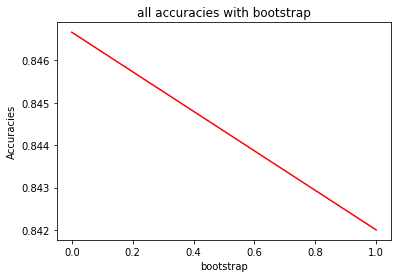

In [107]:
plt.plot(boots,accur,'r')
plt.legend()
plt.title('all accuracies with bootstrap')
plt.xlabel("bootstrap")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_boo.jpeg")

In [101]:
clf = DecisionTreeClassifier(min_samples_split=200, min_samples_leaf=2,max_depth=20)
clf.fit(train_X, train_Y)
train_out = clf.predict(train_X)
valid_out = clf.predict(valid_X)
test_out = clf.predict(test_X)
print ("training accuracy :",accuracy_score(train_out,train_Y))
print ("validation accuracy :",accuracy_score(valid_out,valid_Y))
print ("test accuracy :",accuracy_score(test_out,test_Y))

training accuracy : 0.8648148148148148
validation accuracy : 0.8526666666666667
test accuracy : 0.8481428571428572


In [109]:
# def prune_tree(data,raw):
#     if raw:
#         num_nodes = len(global_node_list_raw)
#     else:
#         num_nodes = len(global_node_list)
#     benef_list = []
#     for i in range(num_nodes):
#         benef_list.append(0)
#     pos_list = []
#     neg_list = []
#     for i in range(len(data)):
#         if data[i][0] == 1:
#             pos_list.append(data[i])
#         else:
#             neg_list.append(data[i])
#     if raw:
#         accuracy_recur(pos_list,neg_list,tree_root_raw,benef_list,raw)
#     else:
#         accuracy_recur(pos_list,neg_list,tree_root,benef_list,raw)
#     miss_change = []
#     node_change = []
#     while True:
#         sum_benef_list = summ(benef_list,raw)
#         minind = -1
#         minn = 0
#         for i in range(len(sum_benef_list)):
#             if sum_benef_list[i] < minn :
#                 minind = i
#                 minn = sum_benef_list[i]
#         if minind == -1:
#             break
#         if raw:
#             node = global_node_list_raw[minind]
#         else:
#             node = global_node_list[minind]
#         removed = node_count(node)
#         miss_change.append(-1*minn/(1.0*len(data)))
#         node_change.append(-1*removed)
#         node.is_leaf = 1
#         node.attr = None
#         node.child_list = None
#     return (miss_change,node_change)

In [110]:
# miss_change,node_change = prune_tree(valid_data,0)

In [111]:
# print (miss_change)
# print (node_change)

In [112]:
# train_accur_prune = accuracy(train_data,0)
# valid_accur_prune = accuracy(valid_data,0)
# test_accur_prune = accuracy(test_data,0)

In [113]:
# import matplotlib.pyplot as plt
# plt.plot(train_accur_prune,'r',label="Training")
# plt.plot(valid_accur_prune,'b',label="Validation")
# plt.plot(test_accur_prune,'g',label="Test")
# plt.legend()
# plt.title('all accuracies after pruning')
# plt.xlabel("Number of Nodes")
# plt.ylabel("Accuracies")
# plt.savefig("../output/accuracy_basic_prune.jpeg")